# Práctica 4: Clasificación
## Tratamiento Inteligente de Datos

Autor: Pedro Manuel Flores Crespo


### Cargamos los datos

Primero unas importaciones básicas

In [302]:
import pandas as pd 
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

Cargamos el archivo (es necesario subirlo al espacio de trabajo)

In [303]:
subastas = pd.read_excel("eBayAuctions.xls")
subastas.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [304]:
subastas['Category'].value_counts()

Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: Category, dtype: int64

In [305]:
subastas['currency'].value_counts()

US     1292
EUR     533
GBP     147
Name: currency, dtype: int64

In [306]:
subastas['endDay'].value_counts()

Mon    548
Sat    351
Sun    338
Fri    287
Thu    202
Tue    171
Wed     75
Name: endDay, dtype: int64

Vemos los tipos de dato que son cada columna

In [307]:
subastas.dtypes

Category         object
currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [308]:
subastas.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,23.583208,0.540568
std,5973.011033,2.052906,89.493858,246.719772,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.873549,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,8925.000000,1.000000


### Preprocesamiento



Lo que vamos a hacer es convertir los atributos nominales/categóricos a numéricos 

In [309]:
from sklearn.preprocessing import LabelEncoder

In [310]:
lb_make = LabelEncoder()
subastas["Category"] = lb_make.fit_transform(subastas["Category"])
subastas["currency"] = lb_make.fit_transform(subastas["currency"])
subastas["endDay"] = lb_make.fit_transform(subastas["endDay"])
subastas.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,13,2,3249,5,1,0.01,0.01,0
1,13,2,3249,5,1,0.01,0.01,0
2,13,2,3249,5,1,0.01,0.01,0
3,13,2,3249,5,1,0.01,0.01,0
4,13,2,3249,5,1,0.01,0.01,0


Contamos los valores para ver la correspondia entre la categoría y el número asignado

In [311]:
subastas['Category'].value_counts()

13    403
6     239
17    234
1     178
0     177
16    124
4     119
11    102
12     82
10     64
8      55
2      54
5      37
7      36
15     20
3      18
9      17
14     13
Name: Category, dtype: int64

In [312]:
subastas['currency'].value_counts()

2    1292
0     533
1     147
Name: currency, dtype: int64

In [313]:
subastas['endDay'].value_counts()

1    548
2    351
3    338
0    287
4    202
5    171
6     75
Name: endDay, dtype: int64

También vemos que columnas como 'sellerRaring', 'ClosePrice' y 'OpenPrince' tienen demsiados atributos por lo que vamos a realizar una discretización mediante `pd.qcut` (Quantile-based discretization function). Primero vemos las separaciones que hace y luego las asignamos.

In [314]:
pd.qcut(subastas['sellerRating'], 10, labels=False, retbins=True)

(0       6
 1       6
 2       6
 3       6
 4       6
        ..
 1967    6
 1968    0
 1969    4
 1970    0
 1971    1
 Name: sellerRating, Length: 1972, dtype: int64,
 array([    0. ,   112.1,   404.2,   743. ,  1184.8,  1853. ,  2380.4,
         3249. ,  3613. ,  5702.8, 37727. ]))

In [315]:
pd.qcut(subastas['OpenPrice'], 10, labels=False, retbins=True)

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1967    9
 1968    9
 1969    9
 1970    9
 1971    9
 Name: OpenPrice, Length: 1972, dtype: int64,
 array([1.00000000e-02, 9.90000000e-01, 1.22975254e+00, 1.99000000e+00,
        3.00000000e+00, 4.87354906e+00, 6.50000000e+00, 9.97800000e+00,
        1.21750675e+01, 2.49900000e+01, 8.92500000e+03]))

In [316]:
pd.qcut(subastas['ClosePrice'], 10, labels=False, retbins=True)

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1967    9
 1968    9
 1969    9
 1970    9
 1971    9
 Name: ClosePrice, Length: 1972, dtype: int64,
 array([1.0000e-02, 2.2410e+00, 3.8540e+00, 5.5860e+00, 7.5000e+00,
        9.9950e+00, 1.4974e+01, 2.2147e+01, 3.6770e+01, 8.0999e+01,
        9.9900e+02]))

In [317]:
subastas['sellerRating'] = pd.qcut(subastas['sellerRating'], 10, labels=False)
subastas['OpenPrice'] = pd.qcut(subastas['OpenPrice'], 10, labels=False)
subastas['ClosePrice'] = pd.qcut(subastas['ClosePrice'], 10, labels=False)
subastas.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,13,2,6,5,1,0,0,0
1,13,2,6,5,1,0,0,0
2,13,2,6,5,1,0,0,0
3,13,2,6,5,1,0,0,0
4,13,2,6,5,1,0,0,0


## Clasificadores

In [318]:
'''
Separamos las columnas para predecir de la columna 'clase'
'''
seed = 77
test = 0.2
def splitClase(df):
  datos = df.iloc[:, :-1]
  labels = df['Competitive?']
  return datos, labels

### Árboles de decisión

In [319]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics

In [320]:
data, label = splitClase(subastas)

In [321]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [322]:
depth = []
for i in range(3,15):
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=seed, criterion='entropy')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(), 'entropy'))
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=seed, criterion='gini')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(), 'gini'))
    #depth.append((i,scores))
print(depth)


[(3, 0.734278738032513, 'entropy'), (3, 0.734278738032513, 'gini'), (4, 0.7895508578037653, 'entropy'), (4, 0.7946308552335668, 'gini'), (5, 0.8143918267686179, 'entropy'), (5, 0.8113589924821693, 'gini'), (6, 0.8164197134228619, 'entropy'), (6, 0.8240352117201054, 'gini'), (7, 0.8336631754803058, 'entropy'), (7, 0.8397442652444902, 'gini'), (8, 0.8453254513911201, 'entropy'), (8, 0.8498926942106276, 'gini'), (9, 0.8468470089314399, 'entropy'), (9, 0.8473571933431858, 'gini'), (10, 0.8478648075563837, 'entropy'), (10, 0.8463432500160637, 'gini'), (11, 0.8387290368180942, 'entropy'), (11, 0.8432962796376021, 'gini'), (12, 0.8356794962410847, 'entropy'), (12, 0.838225277902718, 'gini'), (13, 0.8392392212298401, 'entropy'), (13, 0.8392405063291137, 'gini'), (14, 0.8351770224249824, 'entropy'), (14, 0.8361999614470218, 'gini')]


In [323]:
max = -1
pos_max = -1
for i,j in enumerate(depth):
  if j[1] > max:
    max = j[1]
    pos_max = i

print(depth[pos_max])

(8, 0.8498926942106276, 'gini')


In [324]:
 datos_train, datos_test, labels_train, labels_test = train_test_split( data, label, test_size=test, random_state=seed)

In [334]:
tree_var = tree.DecisionTreeClassifier(max_depth=8, random_state=seed, criterion='gini')
tree_var = tree_var.fit(datos_train, labels_train)
predictions = tree_var.predict(datos_test)

In [335]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[167  16]
 [ 37 175]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       183
           1       0.92      0.83      0.87       212

    accuracy                           0.87       395
   macro avg       0.87      0.87      0.87       395
weighted avg       0.87      0.87      0.87       395



In [336]:
fpr_tree, tpr_tree, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.8690200020620683

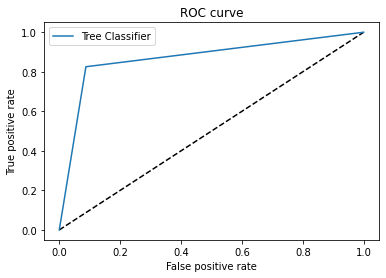

In [337]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [338]:
# Para obtener un PDF con el árbol de decisión generado

names = subastas.columns.tolist()[:-1]

import graphviz 
dot_data = tree.export_graphviz(tree_var, out_file=None, 
                      feature_names=names, 
                      class_names = ["1","0"],         
                      filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("subastas")

'subastas.pdf'

### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression(max_iter=50, random_state=seed)

In [ ]:
scores = cross_val_score(estimator=logReg, X=data, y=label, cv=k_fold)
scores.mean()

0.8007093747992032

In [ ]:
logReg = logReg.fit(datos_train, labels_train)
predictions = logReg.predict(datos_test)

In [ ]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[158  25]
 [ 45 167]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       183
           1       0.87      0.79      0.83       212

    accuracy                           0.82       395
   macro avg       0.82      0.83      0.82       395
weighted avg       0.83      0.82      0.82       395



In [ ]:
fpr_log, tpr_log, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.8255619135993402

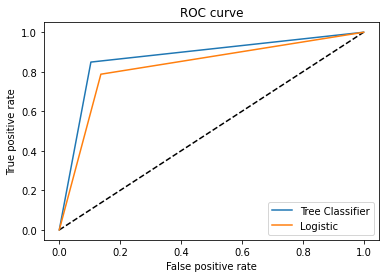

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.plot(fpr_log, tpr_log, label='Logistic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()

In [ ]:
scores = cross_val_score(estimator=naive, X=data, y=label, cv=k_fold)
scores.mean()

0.7221114181070488

In [ ]:
naive = naive.fit(datos_train, labels_train)
predictions = naive.predict(datos_test)

In [ ]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[135  48]
 [ 58 154]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       183
           1       0.76      0.73      0.74       212

    accuracy                           0.73       395
   macro avg       0.73      0.73      0.73       395
weighted avg       0.73      0.73      0.73       395



In [ ]:
fpr_naive, tpr_naive, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.7320600061862047

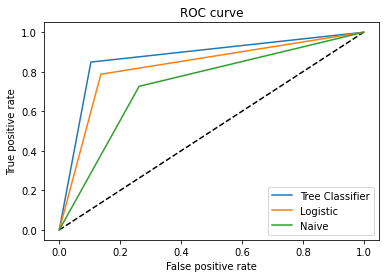

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.plot(fpr_log, tpr_log, label='Logistic')
plt.plot(fpr_naive, tpr_naive, label='Naive')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
depth = []
for i in np.arange(1.0,2.75,0.15):
    clf = SVC(C=i)
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean()))
    #depth.append((i,scores))
print(depth)


[(1.0, 0.7936066311122534), (1.15, 0.7961408468804215), (1.2999999999999998, 0.7986814881449593), (1.4499999999999997, 0.7986814881449592), (1.5999999999999996, 0.7986814881449592), (1.7499999999999996, 0.8002017605860055), (1.8999999999999995, 0.8012144188138535), (2.0499999999999994, 0.8017207479277776), (2.1999999999999993, 0.8027359763541734), (2.349999999999999, 0.8057803765340873), (2.499999999999999, 0.8073019340744072), (2.649999999999999, 0.8067956049604831)]


In [ ]:
max = -1
pos_max = -1
for i,j in enumerate(depth):
  if j[1] > max:
    max = j[1]
    pos_max = i

print(depth[pos_max])

(2.499999999999999, 0.8073019340744072)


In [ ]:
svc = SVC(C=2.5)
svc = svc.fit(datos_train, labels_train)
predictions = svc.predict(datos_test)

In [ ]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[161  22]
 [ 42 170]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       183
           1       0.89      0.80      0.84       212

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



In [ ]:
fpr_svc, tpr_svc, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.8408341066089287

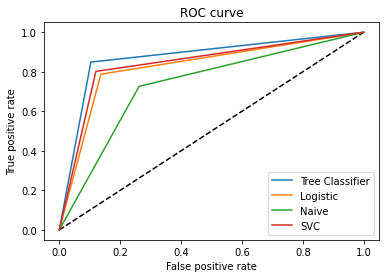

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.plot(fpr_log, tpr_log, label='Logistic')
plt.plot(fpr_naive, tpr_naive, label='Naive')
plt.plot(fpr_svc, tpr_svc, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Stochastic Gradient Descent


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
depth = []
for i in np.arange(0.0001,0.2,0.002):
    clf = SGDClassifier(alpha=i, random_state=seed)
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean()))
    #depth.append((i,scores))
print(depth)


[(0.0001, 0.7571072415344086), (0.0021, 0.7048114116815525), (0.0041, 0.7778718756023904), (0.0061, 0.7875204009509734), (0.0081, 0.7804240827603932), (0.0101, 0.7677504337210049), (0.0121, 0.7743262867056481), (0.0141, 0.7687630919488531), (0.0161, 0.7788999550215254), (0.0181, 0.7667262095996916), (0.0201, 0.7788858189295123), (0.022099999999999998, 0.7880280151641714), (0.0241, 0.7890406733920197), (0.0261, 0.7712883120221037), (0.0281, 0.7890432435905674), (0.0301, 0.7799036175544561), (0.032100000000000004, 0.786003983807749), (0.034100000000000005, 0.7814316005911456), (0.03610000000000001, 0.7773745421833838), (0.0381, 0.7783910557090534), (0.040100000000000004, 0.7768694981687336), (0.042100000000000005, 0.7778847265951295), (0.0441, 0.7738263830880936), (0.0461, 0.7753466555291396), (0.048100000000000004, 0.7748364711173938), (0.050100000000000006, 0.7758542697423376), (0.05210000000000001, 0.7748416115144895), (0.0541, 0.7738276681873675), (0.056100000000000004, 0.77484032641

In [ ]:
max = -1
pos_max = -1
for i,j in enumerate(depth):
  if j[1] > max:
    max = j[1]
    pos_max = i

print(depth[pos_max])

(0.0281, 0.7890432435905674)


In [ ]:
sgd = SGDClassifier(alpha=0.0281, random_state=seed)
sgd = sgd.fit(datos_train, labels_train)
predictions = svc.predict(datos_test)

In [ ]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[161  22]
 [ 42 170]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       183
           1       0.89      0.80      0.84       212

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395



In [ ]:
fpr_sgd, tpr_sgd, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.8408341066089287

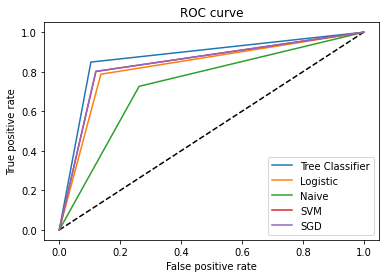

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.plot(fpr_log, tpr_log, label='Logistic')
plt.plot(fpr_naive, tpr_naive, label='Naive')
plt.plot(fpr_svc, tpr_svc, label='SVM')
plt.plot(fpr_sgd, tpr_sgd, label='SGD')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
depth = []
for i in range(3,15):
    clf =  KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(),"uniform"))
    clf =  KNeighborsClassifier(n_neighbors=i, weights='distance')
    scores = cross_val_score(estimator=clf, X=data, y=label, cv=k_fold)
    depth.append((i,scores.mean(),"distance"))
    #depth.append((i,scores))
print(depth)


[(3, 0.7768874895585685, 'uniform'), (3, 0.7885459101715607, 'distance'), (4, 0.7804317933560367, 'uniform'), (4, 0.7951423247445865, 'distance'), (5, 0.7778988626871426, 'uniform'), (5, 0.7966651673841805, 'distance'), (6, 0.7850028914733663, 'uniform'), (6, 0.79869819443552, 'distance'), (7, 0.7829750048191222, 'uniform'), (7, 0.8002210370751139, 'distance'), (8, 0.7738469446764762, 'uniform'), (8, 0.7997108526633683, 'distance'), (9, 0.7773963888710403, 'uniform'), (9, 0.7971702113988305, 'distance'), (10, 0.78247253100302, 'uniform'), (10, 0.8017335989205167, 'distance'), (11, 0.7753672171175224, 'uniform'), (11, 0.8007209406926685, 'distance'), (12, 0.7723202467390606, 'uniform'), (12, 0.8078223992803444, 'distance'), (13, 0.7789038103193471, 'uniform'), (13, 0.8057893722290048, 'distance'), (14, 0.7829608687271091, 'uniform'), (14, 0.8073109297693246, 'distance')]


In [ ]:
max = -1
pos_max = -1
for i,j in enumerate(depth):
  if j[1] > max:
    max = j[1]
    pos_max = i

print(depth[pos_max])

(12, 0.8078223992803444, 'distance')


In [ ]:
kn = KNeighborsClassifier(n_neighbors=12, weights='distance')
kn = kn.fit(datos_train, labels_train)
predictions = kn.predict(datos_test)

In [ ]:
print(metrics.confusion_matrix(labels_test, predictions, labels=[0, 1]))
print(metrics.classification_report(labels_test, predictions, labels=[0, 1]))

[[152  31]
 [ 47 165]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       183
           1       0.84      0.78      0.81       212

    accuracy                           0.80       395
   macro avg       0.80      0.80      0.80       395
weighted avg       0.81      0.80      0.80       395



In [ ]:
fpr_kn, tpr_kn, _ = metrics.roc_curve(labels_test, predictions)
area = metrics.roc_auc_score(labels_test, predictions)
area

0.8044514898443139

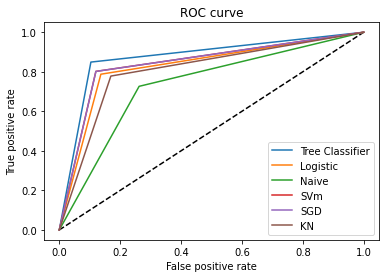

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label='Tree Classifier')
plt.plot(fpr_log, tpr_log, label='Logistic')
plt.plot(fpr_naive, tpr_naive, label='Naive')
plt.plot(fpr_svc, tpr_svc, label='SVm')
plt.plot(fpr_sgd, tpr_sgd, label='SGD')
plt.plot(fpr_kn, tpr_kn, label='KN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()